In [ ]:
# import libraries
import pandas as pd
import numpy as np

# scikit library for linear regression
import statsmodels.api as sm
from statsmodels.formula.api import ols # for anova test

from sklearn.model_selection import train_test_split, KFold

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


**Importing data set**

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/laptop_price_final.csv",encoding='latin-1')

**Explore the Data set**

In [ ]:
data.head()
# data.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Memory,Ram,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


**Print number of rows and columns in data set**

In [ ]:
data.shape

(1303, 13)

In [ ]:
data.info() #info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Ram               1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


**Checking for null values in each column**

In [ ]:
data.isnull().sum()  #summation of null vals in each column 

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Memory              0
Ram                 0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [ ]:
#Drop Column  "laptop_ID" as it has index which is not required.
data.drop(columns = ["laptop_ID"],inplace = True,axis=1)

In [ ]:
len(data['Product'].value_counts())

618

**Product column there are 618 categories as well as there is no common prefixes. Therefore, one-hot encoding is not suitable . Suppose to drop Product column.**





In [ ]:
data.drop(columns = ["Product"],inplace = True,axis=1)

In [ ]:
#Check for Singualirity

for c in data:
    print(c," = ",data[c].value_counts())

Company  =  Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64
TypeName  =  Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64
Inches  =  15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64
ScreenResolution  =  Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS P

**Exploratory Data Analysis(EDA)**

In [ ]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Ram,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
#Check Again For Nulls
data.isnull().sum()  #No Nulls Present

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Memory              0
Ram                 0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


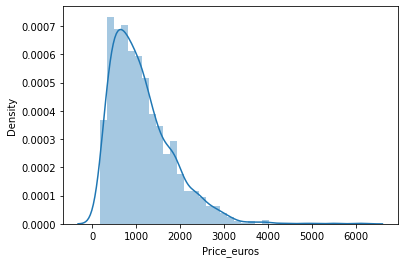

In [ ]:
#Check for the Distribution of the Price Column

sns.distplot(data['Price_euros'])

It is a normal distribution. Positively Skewed

In [ ]:
data["Company"].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [ ]:
def add_company(inpt):
    if inpt == 'Samsung' or inpt == 'Razer' or inpt == 'Mediacom' or inpt == 'Microsoft'or inpt == 'Xiaomi'or inpt == 'Vero'or inpt == 'Chuwi'or inpt == 'Google'or inpt == 'Fujitsu'or inpt == 'LG'or inpt == 'Huawei':
        return 'Other'
    else:
        return inpt


In [ ]:
data['Company'] = data['Company'].apply(add_company)

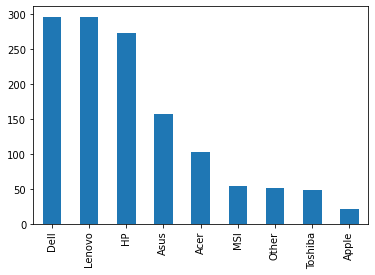

In [ ]:
#Plotting the Company Column
data["Company"].value_counts().plot(kind = "bar")


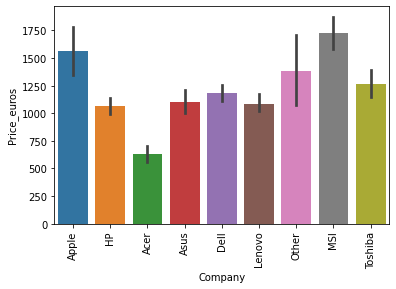

In [ ]:
#Variation of Price Vs Company

sns.barplot(x=data['Company'],y=data['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

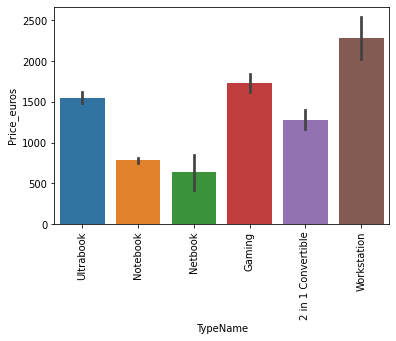

In [ ]:
#Laptop TypeName vs price
data.TypeName.value_counts()
sns.barplot(x=data["TypeName"],y=data["Price_euros"])
plt.xticks(rotation = "vertical")
plt.show()

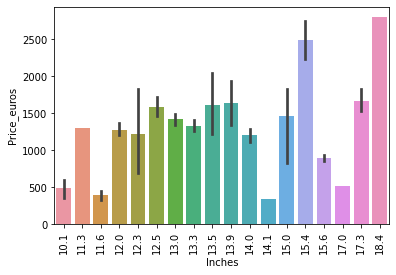

In [ ]:
#Variation of Price vs Inches
data.Inches.value_counts()
sns.barplot(x=data["Inches"],y=data["Price_euros"])
plt.xticks(rotation = "vertical")
plt.show()

In [ ]:
#ScreenResolution
data.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

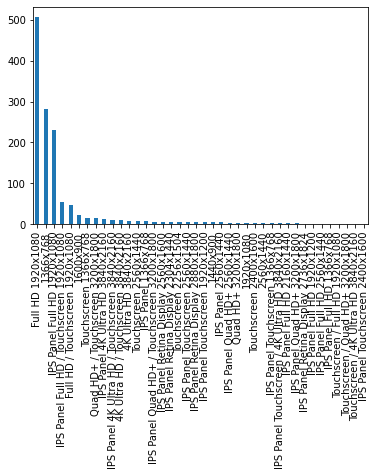

In [ ]:
#Screen Resolution
data["ScreenResolution"].value_counts().plot(kind = "bar")


After analyzing the screen resolution column, we identified that there are same prefixes in some rows such as TouchSCreen, IPS. Therefore, we create new columns called TouchSCreen and IPS to store dummie values.

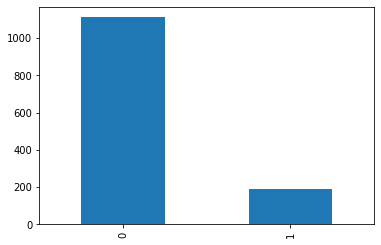

In [ ]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data['Touchscreen'].value_counts().plot(kind='bar')   #barplot

In [ ]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0


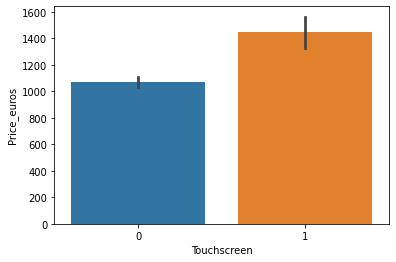

In [ ]:
#Variation of Price vs Touchscreen
sns.barplot(x=data['Touchscreen'],y=data['Price_euros'])


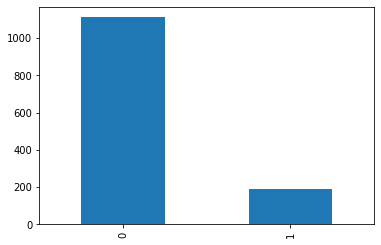

In [ ]:
data['IPS'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
data['Touchscreen'].value_counts().plot(kind='bar')

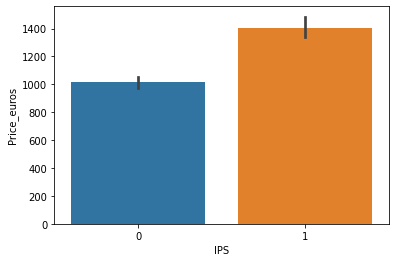

In [ ]:
#Variation of Price vs IPS
sns.barplot(x=data['IPS'],y=data['Price_euros'])


In [ ]:
#Extracting ScreenResolution to list

new = data['ScreenResolution'].str.split('x',n=1,expand=True)
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [ ]:
#Inserting the X Resolution and Y Resolution to the dataframe
data['X_res'] = new[0]
data['Y_res'] = new[1]

In [ ]:
data['X_res'] = data['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0]) 

In [ ]:
data["X_res"] = data["X_res"].astype(float)   #type conversion
data["Y_res"] = data["Y_res"].astype(float)

In [ ]:
#data.corr()
data.corr()['Price_euros']   

Inches         0.068197
Price_euros    1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price_euros, dtype: float64

In [ ]:
##checking the datatypes after conversion
data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Memory               object
Ram                  object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
Touchscreen           int64
IPS                   int64
X_res               float64
Y_res               float64
dtype: object

In [ ]:
#Calculating Pixels Per Inch(Pixel Density)
#PPI = (root(Width^2*height^2)/Screen Size)
#taking into a new column , PPI

data['PPI'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')

In [ ]:
data.corr()['Price_euros'] 

Inches         0.068197
Price_euros    1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price_euros, dtype: float64

We can see that PPI has good correlation with Price so will keep PPI column

In [ ]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,2560.0,1600.0,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,1440.0,900.0,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,1920.0,1080.0,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,2880.0,1800.0,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,2560.0,1600.0,226.983005


In [ ]:
#Dropping unwanted Columns -> "X_res","Y_res","Inches" & "ScreenResolution"
data.drop(columns = ["X_res","Y_res","Inches","ScreenResolution"],inplace =True,axis=1)

In [ ]:
data.head()

,Company,TypeName,Cpu,Memory,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,128GB SSD,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,128GB Flash Storage,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,256GB SSD,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,512GB SSD,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,256GB SSD,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,226.983005


In [ ]:
#CPU
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [ ]:
data['CPU'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [ ]:
def set_processor(name):
    if name == 'Intel Core i7' or name == 'Intel Core i5' or name == 'Intel Core i3':
        return name
    else:
        if name.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [ ]:
data['Cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: Cpu, Length: 1303, dtype: object

In [ ]:
data['CPU_Brand'] = data['CPU'].apply(set_processor)

In [ ]:
data.head()


,Company,TypeName,Cpu,Memory,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,CPU,CPU_Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,128GB SSD,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,128GB Flash Storage,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,256GB SSD,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,512GB SSD,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,256GB SSD,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,226.983005,Intel Core i5,Intel Core i5


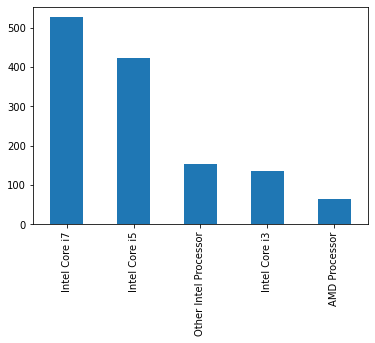

In [ ]:
#Barplot to show the value counts in the CPU_Brand Column
data["CPU_Brand"].value_counts().plot(kind = "bar")

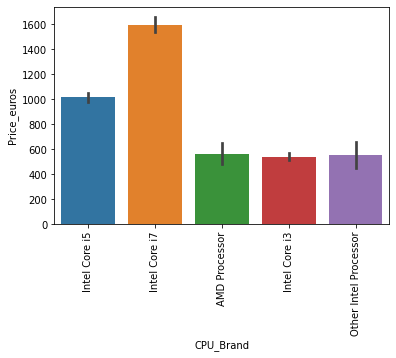

In [ ]:
#Variation of Price vs CPU Brands
sns.barplot(x=data['CPU_Brand'],y=data['Price_euros'])
plt.xticks(rotation = "vertical")
plt.show()

In [ ]:
#Dropping the unwanted Cpu column
data.drop(columns = ["CPU", "Cpu"],inplace=True,axis=1)

In [ ]:
data.head()


,Company,TypeName,Memory,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,CPU_Brand
0,Apple,Ultrabook,128GB SSD,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,128GB Flash Storage,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,256GB SSD,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,512GB SSD,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,256GB SSD,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,226.983005,Intel Core i5


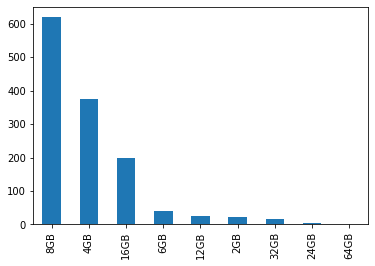

In [ ]:
#Ram
data.Ram.value_counts().plot(kind = "bar")

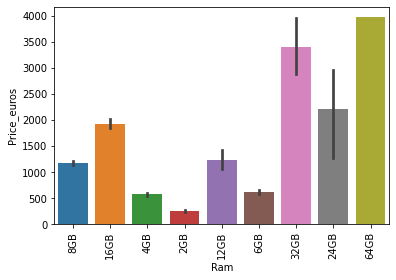

In [ ]:
#BarPlot to represent the variation of Prive vs RAM
sns.barplot(x=data['Ram'],y=data['Price_euros'])
plt.xticks(rotation = "vertical")
plt.show()

In [ ]:
data['Ram'] = data['Ram'].str.replace('GB','')  #eliminating the suffixes

In [ ]:
data.head()

,Company,TypeName,Memory,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,CPU_Brand
0,Apple,Ultrabook,128GB SSD,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,128GB Flash Storage,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,256GB SSD,8,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,512GB SSD,16,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,256GB SSD,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,226.983005,Intel Core i5


In [ ]:
#Weight
data.Weight.value_counts()
data['Weight'] = data['Weight'].str.replace('kg','')  #eliminationg the suffixes

In [ ]:
data.head()

,Company,TypeName,Memory,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,CPU_Brand
0,Apple,Ultrabook,128GB SSD,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,128GB Flash Storage,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,256GB SSD,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,512GB SSD,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,256GB SSD,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


In [ ]:
#Memory
data.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [ ]:
data["Memory"].str.split()


0                  [128GB, SSD]
1       [128GB, Flash, Storage]
2                  [256GB, SSD]
3                  [512GB, SSD]
4                  [256GB, SSD]
                 ...           
1298               [128GB, SSD]
1299               [512GB, SSD]
1300     [64GB, Flash, Storage]
1301                 [1TB, HDD]
1302               [500GB, HDD]
Name: Memory, Length: 1303, dtype: object

In [ ]:
#remove decimal places in 1.0 TB 
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)


In [ ]:
data["Memory"] = data["Memory"].str.replace('GB', '')  #remove siffix 'GB'

In [ ]:
data.Memory

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301              1TB HDD
1302              500 HDD
Name: Memory, Length: 1303, dtype: object

still the TB vals are there

In [ ]:
# replace the TB word with "000"
data["Memory"] = data["Memory"].str.replace('TB', '000')

In [ ]:
# split the word from the "+" character
newDF = data["Memory"].str.split("+", n = 1, expand = True)

In [ ]:
newDF

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [ ]:
data["first"]= newDF[0]

In [ ]:
#stripping white spaces at begining and end
data["first"]=data["first"].str.strip()

In [ ]:
data["second"]= newDF[1]

In [ ]:
data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [ ]:
data

,Company,TypeName,Memory,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,CPU_Brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,128 SSD,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,128 Flash Storage,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,128 Flash Storage,None,0,0,0,1
2,HP,Notebook,256 SSD,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,256 SSD,None,0,1,0,0
3,Apple,Ultrabook,512 SSD,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,512 SSD,None,0,1,0,0
4,Apple,Ultrabook,256 SSD,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,256 SSD,None,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,128 SSD,4,Intel HD Graphics 520,Windows 10,1.8,638.00,1,1,157.350512,Intel Core i7,128 SSD,None,0,1,0,0
1299,Lenovo,2 in 1 Convertible,512 SSD,16,Intel HD Graphics 520,Windows 10,1.3,1499.00,1,1,276.053530,Intel Core i7,512 SSD,None,0,1,0,0
1300,Lenovo,Notebook,64 Flash Storage,2,Intel HD Graphics,Windows 10,1.5,229.00,0,0,111.935204,Other Intel Processor,64 Flash Storage,None,0,0,0,1
1301,HP,Notebook,1000 HDD,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,100.454670,Intel Core i7,1000 HDD,None,1,0,0,0


In [ ]:
data['first'] = data['first'].str.replace(r'\D', '')


data["second"].fillna("0", inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
data

,Company,TypeName,Memory,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,CPU_Brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,128 SSD,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,128,0,0,1,0,0
1,Apple,Ultrabook,128 Flash Storage,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,128,0,0,0,0,1
2,HP,Notebook,256 SSD,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,256,0,0,1,0,0
3,Apple,Ultrabook,512 SSD,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,512,0,0,1,0,0
4,Apple,Ultrabook,256 SSD,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,256,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,128 SSD,4,Intel HD Graphics 520,Windows 10,1.8,638.00,1,1,157.350512,Intel Core i7,128,0,0,1,0,0
1299,Lenovo,2 in 1 Convertible,512 SSD,16,Intel HD Graphics 520,Windows 10,1.3,1499.00,1,1,276.053530,Intel Core i7,512,0,0,1,0,0
1300,Lenovo,Notebook,64 Flash Storage,2,Intel HD Graphics,Windows 10,1.5,229.00,0,0,111.935204,Other Intel Processor,64,0,0,0,0,1
1301,HP,Notebook,1000 HDD,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,100.454670,Intel Core i7,1000,0,1,0,0,0


In [ ]:
data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [ ]:
data['second'] = data['second'].str.replace(r'\D', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
#Type Conversions

data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)

In [ ]:
# multiplying the elements and storing the result in subsequent columns
data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])

# dropping of uncessary columns

data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True,axis=1)

In [ ]:
data.drop(columns = "Memory",inplace = True,axis=1)

In [ ]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,CPU_Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0


In [ ]:
data.corr()['Price_euros']

Price_euros      1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price_euros, dtype: float64

In [ ]:
#Feature Hybrid and Flash Storage showing negligible correlation(correlatrion closer to zero) with Price we will drop those feature

data.drop(columns = ["Hybrid","Flash_Storage"],inplace = True,axis=1)

In [ ]:
#Gpu

data.Gpu.value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [ ]:
#To extract the 0th index of 'Gpu' column vals and taking into a new col named 'Gpu_Brand'
data['Gpu_Brand'] = data['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
#Checking the Value Counts
data['Gpu_Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_Brand, dtype: int64

Only 1 ARM Processor

In [ ]:
data = data[data['Gpu_Brand'] != 'ARM']

In [ ]:
#Checking the value counts of the newly created 'Gpu_Brand' column
data['Gpu_Brand'].value_counts()


Intel     722
Nvidia    400
AMD       180
Name: Gpu_Brand, dtype: int64

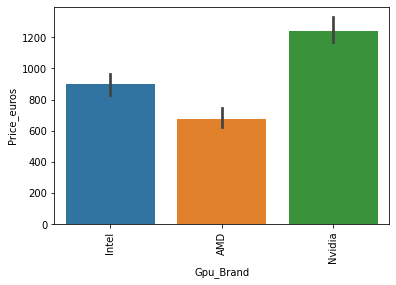

In [ ]:
#Variation of Price vs Gpu_Brand
sns.barplot(x=data['Gpu_Brand'],y=data['Price_euros'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#Dropping the previous 'Gpu' Cloumn
data.drop(columns=['Gpu'],inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data.head()


,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,CPU_Brand,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
#Operating System
#Checking Value Counts
data['OpSys'].value_counts()


Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [ ]:
#function to 

def set_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
data['os'] = data['OpSys'].apply(set_os)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.head()


,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,CPU_Brand,HDD,SSD,Gpu_Brand,os
0,Apple,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
#Dropping the Original 'OpSys' column
data.drop(columns = "OpSys",inplace = True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data.head()


,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,IPS,PPI,CPU_Brand,HDD,SSD,Gpu_Brand,os
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


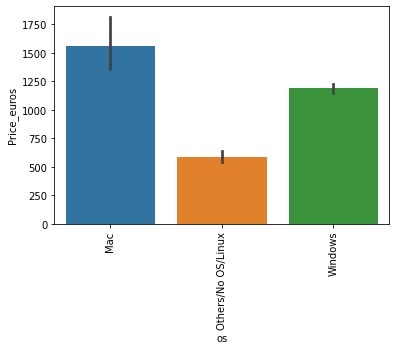

In [ ]:
#barplot to represent the variation of Price vs OS
sns.barplot(x=data['os'],y=data['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


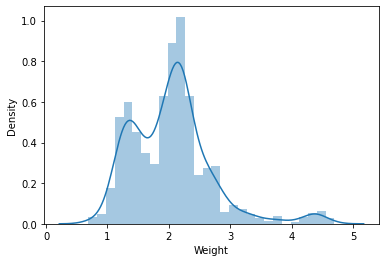

In [ ]:
#Check for the Distribution of the 'Weight' Column

sns.distplot(data['Weight'])


In [ ]:
data.corr()['Price_euros']

Price_euros    1.000000
Touchscreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price_euros, dtype: float64

'Ram' and 'Weight' not appearing because of data type is not numeric

In [ ]:
#Type conversions
data['Ram'] = data['Ram'].astype('int32')           #converting to integer
data['Weight'] = data['Weight'].astype('float32')   #converting to float

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#to check datatypes
data.dtypes


Company         object
TypeName        object
Ram              int32
Weight         float32
Price_euros    float64
Touchscreen      int64
IPS              int64
PPI            float64
CPU_Brand       object
HDD              int64
SSD              int64
Gpu_Brand       object
os              object
dtype: object

In [ ]:
# function to plot the histogram, correlation matrix, boxplot based on the chart-type
def plotdata(data,nc,ctype):
    if ctype not in ['h','c','b']:
        msg='Invalid Chart Type specified'
        return(msg)
    
    if ctype=='c':
        cor = data[nc].corr()
        cor = np.tril(cor)
        sns.heatmap(cor,vmin=-1,vmax=1,xticklabels=nc,
                    yticklabels=nc,square=False,annot=True,linewidths=1)
    else:
        COLS = 2
        ROWS = int(np.ceil(len(nc)/COLS))
        POS = 1
        
        fig = plt.figure() # outer plot
        for c in nc:
            fig.add_subplot(ROWS,COLS,POS)
            if ctype=='b':
                sns.boxplot(data[c],color='yellow')
            else:
                sns.distplot(data[c],bins=20,color='green')
            
            POS+=1
    return(1)

In [ ]:
### Function to split columns into NC and FC
def splitcols(data):
    nc=data.select_dtypes(exclude='object').columns.values
    fc=data.select_dtypes(include='object').columns.values
    return(nc,fc)

In [ ]:
#Spliting Columns
nc,fc = splitcols(data)
print(nc)
print(fc)

['Ram' 'Weight' 'Price_euros' 'Touchscreen' 'IPS' 'PPI' 'HDD' 'SSD']
['Company' 'TypeName' 'CPU_Brand' 'Gpu_Brand' 'os']


1

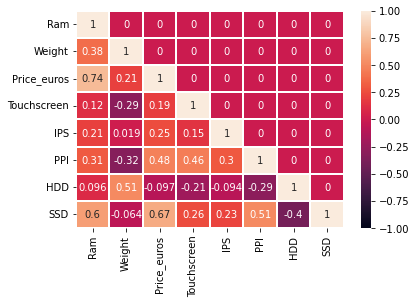

In [ ]:
plotdata(data,nc,"c")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


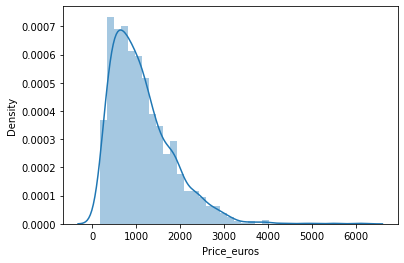

In [ ]:
sns.distplot(data['Price_euros'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


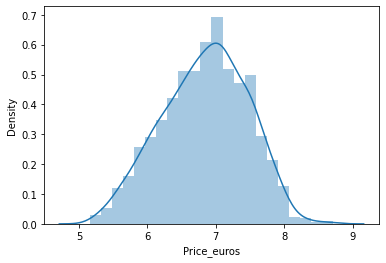

In [ ]:
sns.distplot(np.log(data['Price_euros']))

In [ ]:
data.head()


,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,IPS,PPI,CPU_Brand,HDD,SSD,Gpu_Brand,os
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
dataSet = pd.get_dummies(data)

In [ ]:
dataSet

,Ram,Weight,Price_euros,Touchscreen,IPS,PPI,HDD,SSD,Company_Acer,Company_Apple,...,CPU_Brand_Intel Core i3,CPU_Brand_Intel Core i5,CPU_Brand_Intel Core i7,CPU_Brand_Other Intel Processor,Gpu_Brand_AMD,Gpu_Brand_Intel,Gpu_Brand_Nvidia,os_Mac,os_Others/No OS/Linux,os_Windows
0,8,1.37,1339.69,0,1,226.983005,0,128,0,1,...,0,1,0,0,0,1,0,1,0,0
1,8,1.34,898.94,0,0,127.677940,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,8,1.86,575.00,0,0,141.211998,0,256,0,0,...,0,1,0,0,0,1,0,0,1,0
3,16,1.83,2537.45,0,1,220.534624,0,512,0,1,...,0,0,1,0,1,0,0,1,0,0
4,8,1.37,1803.60,0,1,226.983005,0,256,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,638.00,1,1,157.350512,0,128,0,0,...,0,0,1,0,0,1,0,0,0,1
1299,16,1.30,1499.00,1,1,276.053530,0,512,0,0,...,0,0,1,0,0,1,0,0,0,1
1300,2,1.50,229.00,0,0,111.935204,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1301,6,2.19,764.00,0,0,100.454670,1000,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
t = [x for x in dataSet.columns]
t

['Ram',
 'Weight',
 'Price_euros',
 'Touchscreen',
 'IPS',
 'PPI',
 'HDD',
 'SSD',
 'Company_Acer',
 'Company_Apple',
 'Company_Asus',
 'Company_Dell',
 'Company_HP',
 'Company_Lenovo',
 'Company_MSI',
 'Company_Other',
 'Company_Toshiba',
 'TypeName_2 in 1 Convertible',
 'TypeName_Gaming',
 'TypeName_Netbook',
 'TypeName_Notebook',
 'TypeName_Ultrabook',
 'TypeName_Workstation',
 'CPU_Brand_AMD Processor',
 'CPU_Brand_Intel Core i3',
 'CPU_Brand_Intel Core i5',
 'CPU_Brand_Intel Core i7',
 'CPU_Brand_Other Intel Processor',
 'Gpu_Brand_AMD',
 'Gpu_Brand_Intel',
 'Gpu_Brand_Nvidia',
 'os_Mac',
 'os_Others/No OS/Linux',
 'os_Windows']

In [ ]:
#data.to_csv('Processed_laptop_Price_Prediction', index=False)  #to export to a new csv file
data_old = data.copy()  #copying the dataframe


In [ ]:
#Using One hot coding changing the data types of all the factor variables
#Factor Variables - categorical variables that can be either numeric or string variables.

from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
for i in fc:   
    data[i]= le.fit_transform(data[i])
    print(data)
fc

      Company            TypeName  Ram  Weight  Price_euros  Touchscreen  IPS  \
0           1           Ultrabook    8    1.37      1339.69            0    1   
1           1           Ultrabook    8    1.34       898.94            0    0   
2           4            Notebook    8    1.86       575.00            0    0   
3           1           Ultrabook   16    1.83      2537.45            0    1   
4           1           Ultrabook    8    1.37      1803.60            0    1   
...       ...                 ...  ...     ...          ...          ...  ...   
1298        5  2 in 1 Convertible    4    1.80       638.00            1    1   
1299        5  2 in 1 Convertible   16    1.30      1499.00            1    1   
1300        5            Notebook    2    1.50       229.00            0    0   
1301        4            Notebook    6    2.19       764.00            0    0   
1302        2            Notebook    4    2.20       369.00            0    0   

             PPI           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

array(['Company', 'TypeName', 'CPU_Brand', 'Gpu_Brand', 'os'],
      dtype=object)

In [ ]:
data


,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,IPS,PPI,CPU_Brand,HDD,SSD,Gpu_Brand,os
0,1,4,8,1.37,1339.69,0,1,226.983005,2,0,128,1,0
1,1,4,8,1.34,898.94,0,0,127.677940,2,0,0,1,0
2,4,3,8,1.86,575.00,0,0,141.211998,2,0,256,1,1
3,1,4,16,1.83,2537.45,0,1,220.534624,3,0,512,0,0
4,1,4,8,1.37,1803.60,0,1,226.983005,2,0,256,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,5,0,4,1.80,638.00,1,1,157.350512,3,0,128,1,2
1299,5,0,16,1.30,1499.00,1,1,276.053530,3,0,512,1,2
1300,5,3,2,1.50,229.00,0,0,111.935204,4,0,0,1,2
1301,4,3,6,2.19,764.00,0,0,100.454670,3,1000,0,0,2


In [ ]:
data.shape

(1302, 13)

In [ ]:
data.corr()['Price_euros']

Company        0.171986
TypeName      -0.128608
Ram            0.742905
Weight         0.209867
Price_euros    1.000000
Touchscreen    0.192917
IPS            0.253320
PPI            0.475368
CPU_Brand      0.245597
HDD           -0.096891
SSD            0.670660
Gpu_Brand      0.355788
os             0.176937
Name: Price_euros, dtype: float64

In [ ]:
# split the dataset
X_train,X_test,y_train,y_test = train_test_split(dataSet.drop('Price_euros',axis=1),np.log(dataSet["Price_euros"]),test_size=0.25)

---------------------------------------hash

In [ ]:
# P = dataSet.drop('Price_euros',axis=1)
# q = dataSet['Price_euros']


In [ ]:
# P_train,P_test,q_train,q_test = train_test_split(P,q, test_size=0.25)

In [ ]:
# P_train.shape,P_test.shape

----------------------hash end

In [ ]:
X_train.shape,X_test.shape

((976, 33), (326, 33))

In [ ]:
y_train.shape,y_test.shape

((976,), (326,))

In [ ]:
X_train.columns

Index(['Ram', 'Weight', 'Touchscreen', 'IPS', 'PPI', 'HDD', 'SSD',
       'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Dell',
       'Company_HP', 'Company_Lenovo', 'Company_MSI', 'Company_Other',
       'Company_Toshiba', 'TypeName_2 in 1 Convertible', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'CPU_Brand_AMD Processor',
       'CPU_Brand_Intel Core i3', 'CPU_Brand_Intel Core i5',
       'CPU_Brand_Intel Core i7', 'CPU_Brand_Other Intel Processor',
       'Gpu_Brand_AMD', 'Gpu_Brand_Intel', 'Gpu_Brand_Nvidia', 'os_Mac',
       'os_Others/No OS/Linux', 'os_Windows'],
      dtype='object')

#Feature Selection

In [ ]:
def anovatest(x,y,data):
    model = ols('x~y',data=data).fit()
    anova = sm.stats.anova_lm(model,type=2)
    pvalue = anova['PR(>F)'][0]

    if pvalue < 0.05:
        msg = 'Reject H0: Feature {} is significant'.format(x.name)
    else:
        msg = 'FTR H0: Feature {} is insignificant'.format(x.name)
    
    return(msg)

In [ ]:
dataSet.columns

Index(['Ram', 'Weight', 'Price_euros', 'Touchscreen', 'IPS', 'PPI', 'HDD',
       'SSD', 'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Dell',
       'Company_HP', 'Company_Lenovo', 'Company_MSI', 'Company_Other',
       'Company_Toshiba', 'TypeName_2 in 1 Convertible', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'CPU_Brand_AMD Processor',
       'CPU_Brand_Intel Core i3', 'CPU_Brand_Intel Core i5',
       'CPU_Brand_Intel Core i7', 'CPU_Brand_Other Intel Processor',
       'Gpu_Brand_AMD', 'Gpu_Brand_Intel', 'Gpu_Brand_Nvidia', 'os_Mac',
       'os_Others/No OS/Linux', 'os_Windows'],
      dtype='object')

In [ ]:
#Testing Annova test for feature selection

anovatest(data.Company, data.Price_euros,data)

'Reject H0: Feature Company is significant'

In [ ]:
for i in data:
    print(anovatest(data[i], data.Price_euros,data))  #performing Annova test for feature selection for all columns

Reject H0: Feature Company is significant
Reject H0: Feature TypeName is significant
Reject H0: Feature Ram is significant
Reject H0: Feature Weight is significant
Reject H0: Feature Price_euros is significant
Reject H0: Feature Touchscreen is significant
Reject H0: Feature IPS is significant
Reject H0: Feature PPI is significant
Reject H0: Feature CPU_Brand is significant
Reject H0: Feature HDD is significant
Reject H0: Feature SSD is significant
Reject H0: Feature Gpu_Brand is significant
Reject H0: Feature os is significant


All the features are significant




#Model Building

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn .metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
rf_model = RandomForestRegressor(n_estimators = 100, max_features = 'sqrt', max_depth = 10, random_state = 10).fit(X_train, y_train)

In [ ]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', random_state=10)

In [ ]:
rf_model.score(X_test,y_test)

0.8854805344736318

In [ ]:
prediction = rf_model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
# print(mse)
# print(rmse)

In [ ]:
print("Model DT \n\tmse={}, \n\trmse={}".format(round(mse,2),round(np.sqrt(mse),2)))
print('R2 score',r2_score(y_test,prediction))
print('MAE',mean_absolute_error(y_test,prediction))


Model DT 
	mse=0.05, 
	rmse=0.22
R2 score 0.8854805344736318
MAE 0.16921330825096018


In [ ]:
print(np.exp(mse))

1.0479960445822547


##hyper parameter tuning


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [ ]:
new_rf = RandomForestRegressor()

In [ ]:
grid_search = GridSearchCV(estimator = new_rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(max_depth=100, max_features=3, min_samples_leaf=3,
                      min_samples_split=8)

In [ ]:
best_model.score(X_test, y_test)


0.8599684883137625

In [ ]:
prediction2 = best_model.predict(X_test)
mse = mean_squared_error(y_test, prediction2)
rmse = mse**.5
print(mse)
print(rmse)

0.057323450306754016
0.23942316159209412


##Decision Tree

In [ ]:
import statsmodels.api as smapi
from sklearn.tree import DecisionTreeRegressor
from sklearn .metrics import mean_squared_error, r2_score, mean_absolute_error # calculating different regression metrics

from sklearn.model_selection import GridSearchCV

In [ ]:
DT = DecisionTreeRegressor(random_state=0).fit(X_train,y_train)

In [ ]:
pred_DT = DT.predict(X_test)

In [ ]:
print(pred_DT[0:5])

[7.74022952 6.4846505  6.96129605 6.69207134 7.08590146]


In [ ]:
Df1 = pd.DataFrame({"actual_CCS":y_test,"predCCS_DT":pred_DT})  #Store the prediction into a data frame for analysiis

In [ ]:
Df1

,actual_CCS,predCCS_DT
1189,7.862882,7.740230
683,6.549651,6.484651
607,6.335054,6.961296
1267,6.692071,6.692071
981,7.085901,7.085901
...,...,...
914,6.212606,5.950643
133,6.349139,6.646378
313,6.150603,7.002156
1122,7.321850,6.855409


In [ ]:
# Calculating Mean Squared Error for Decision Tree
mse2 = mean_squared_error(y_test,pred_DT)

In [ ]:
print("Model DT \n\tmse={}, \n\trmse={}".format(round(mse2,2),round(np.sqrt(mse2),2)))
print('R2 score',r2_score(y_test,pred_DT))
print('MAE',mean_absolute_error(y_test,pred_DT))

Model DT 
	mse=0.08, 
	rmse=0.28
R2 score 0.8078380117052717
MAE 0.20268255497541773


##Ridge Model

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge()

In [ ]:
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
ridge.score(X_train, y_train)

0.8298925362120485

In [ ]:
ridge.score(X_test, y_test)

0.7894621429735469

In [ ]:
preds = ridge.predict(X_test)

In [ ]:
# Calculating Mean Squared Error for Ridge
mse3 = mean_squared_error(y_test,preds)

In [ ]:
print("Model DT \n\tmse={}, \n\trmse={}".format(round(mse3,2),round(np.sqrt(mse3),2)))
print('R2 score',r2_score(y_test,preds))
print('MAE',mean_absolute_error(y_test,preds))

Model DT 
	mse=0.09, 
	rmse=0.29
R2 score 0.7894621429735469
MAE 0.23101286568501095


create pickle file

In [ ]:
import pickle 
with open('pickleMy.pickle', 'wb') as file:
  pickle.dump(best_model, file)

In [ ]:
len(X_train.columns)

33

In [ ]:
X_train.columns

Index(['Ram', 'Weight', 'Touchscreen', 'IPS', 'PPI', 'HDD', 'SSD',
       'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Dell',
       'Company_HP', 'Company_Lenovo', 'Company_MSI', 'Company_Other',
       'Company_Toshiba', 'TypeName_2 in 1 Convertible', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'CPU_Brand_AMD Processor',
       'CPU_Brand_Intel Core i3', 'CPU_Brand_Intel Core i5',
       'CPU_Brand_Intel Core i7', 'CPU_Brand_Other Intel Processor',
       'Gpu_Brand_AMD', 'Gpu_Brand_Intel', 'Gpu_Brand_Nvidia', 'os_Mac',
       'os_Others/No OS/Linux', 'os_Windows'],
      dtype='object')

test model

In [ ]:
xxx= rf_model.predict([[8,1.37,0,1,226.98,0,128,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0]])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
predicted_price = np.exp(xxx)
print(predicted_price)

1176.1894859971476
